# Project: Investigate a Dataset - No show appointments

## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
##### ● 'gender' indicates Whether patient male or female.
##### ● 'scheduled_day' tells us on what day the patient set up their appointment.
##### ● 'appointment_day' indicates on what day the patient attended.
##### ● 'age' indicates how old the patient is.
##### ● ‘neighborhood’ indicates the location of the hospital.
##### ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
##### ● 'hipertension, diabetes, alcoholism, handcap' tell us whether the patient suffer from any of them.
##### ● 'sms_received' tell us whether the patient recieved moblie message about the appointment or not.
##### ● 'time' indicates the time of appointment by hour, minutes and seconds.
##### ● 'no-show' it says ‘No’ if  patients showed up to their appointment, and ‘Yes’ if they did not show up.
we will use all of these data to determine factors which impact patient's show up for their scheduled appointments.
### Question(s) for Analysis
##### 1- Are younger patients showed up to their appointment or older ones ? 
##### 2- Which gender more showed up to their appointment ?
##### 3- What is the range of days that patients become late from scheduled day ?
##### 4- Which the most frequent place that patients showed up to their appointments ?
##### 5- Does scholarship affect on patient's attendance according to scheduled day ?
##### 6- Does alcoholism affect on patient's attendance according to scheduled day ?
##### 7- Does diabetes affect on patient's attendance according to scheduled day ?
##### 8- Does hypertension affect on patient's attendance according to scheduled day ?
##### 9- Do SMS lead to more attendance according to scheduled day ?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

Loading data and printing out first 5 lines

In [19]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


let's access data by these methods :

getting information about the number of columns and rows

In [20]:
# shape
df.shape

(110527, 14)

getting information about statistics of the dataset

In [21]:
# show statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is an abnormal value that the minimum age is -1, so we need to remove this value. let's check this then drop that row in the clening process.

In [22]:
# get the row that have age of -1
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


to know if there are non null or missing data and in which column

In [23]:
# exploring null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing data, so nothing to do.


### Data Cleaning 

we will not need patientid and appointment id columns in our analysis, so we will drop them from our dataset.

In [24]:
# drop unnecessary columns then disply the first row to make sure of dropping
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


for making work with python much easier, we will clean column names by making every label lower and putting underscores between words instead of being one large word.

In [25]:
# rename columns for making analysis easier then disply the first row to make sure of changes 
df.rename(columns=lambda x: x.lower(), inplace=True)
df.rename(columns={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'no-show':'no_show'}, inplace=True)
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


let's drop abnormal value of age which is -1 by the index of this row

In [26]:
#drop the row that have age of -1 then show statistics of data to make sure there is no another abnormal values
df = df.drop(99832)
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we want to separate time from date in the scheduled_day column and insert new column for time for making analysis and calculations easier.

In [27]:
#split time from scheduled day and create a new column for time
df['time'] = df['scheduled_day'].apply(lambda x: x.split("T")[1])
df['scheduled_day']= df['scheduled_day'].apply(lambda x: x.split("T")[0])
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time
0,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z


we want to remove the time from appointment_day because it is meaningless as there is no time determined in all rows and to make the analysis and comparison between scheduled_day and appointment_day easier.

In [28]:
#replace time from appointment day
df['appointment_day']= df['appointment_day'].apply(lambda x: x.replace('T00:00:00Z', ''))
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z


we need to convert both of schaduled day and appointment day into date time to enable us for making calculations.

In [29]:
#conversion of scheduled day and appointment day into datetime
df['scheduled_day']= pd.to_datetime(df['scheduled_day'])
df['appointment_day']= pd.to_datetime(df['appointment_day'])

we want to know if there are null or empty cells.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null object
time               110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 11.8+ MB


great, no empty cells, every cell filled by data

now we want to know number of rows and columns after cleaning.

In [31]:
df.shape

(110526, 13)

<a id='eda'></a>
## Exploratory Data Analysis

### Are younger patients showed up to their appointment or older ones ? 

In [34]:
def myHistPlot(df, xVar, bins=20, figsize=[8,6], title=''):
    
    ''' This function is for plotting the histogram easily without need for repetition of the code
    we express about the variable by xVar and determine bins, size of figure, title, x-label and y-label
    when returning this function elsewhere, histogram will plotted,
    only we need is to explain which variable we want by writing its name'''
    
    df[xVar].hist(bins=bins,
                   grid=False,
                   edgecolor='black',
                   figsize=figsize);
    xVar= xVar.replace('_',' ')
    plt.title(f'Distribution of {xVar}{title}'.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(), fontsize=14)
    plt.ylabel('Frequency'.title(), fontsize=14)

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


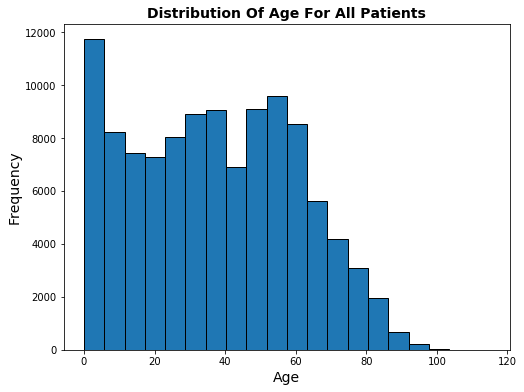

In [35]:
#plot frequency of age for all of the data
myHistPlot(df, 'age', title= ' for all patients')
print(df['age'].describe())

this histogram explains the distrbution of age for all data, as we see in the summary of data description, the average and median are approximately the same.
the most frequently age in total data from 48 years to 55

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64


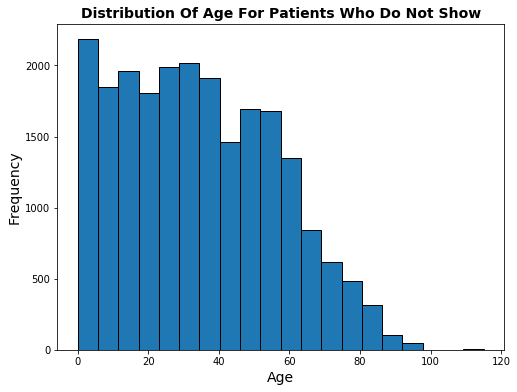

In [36]:
#dataframe for those do not show
df_yes= df.query('no_show=="Yes"')
print(df_yes['age'].describe())
#plot distribution of age for those do not show
myHistPlot(df_yes, 'age', title= ' for patients who do not show')

This histogram shows the number of patients of each age who didnot attend on the scheduled day. It is more skewed to right. number of patients reduce as they are older.

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64


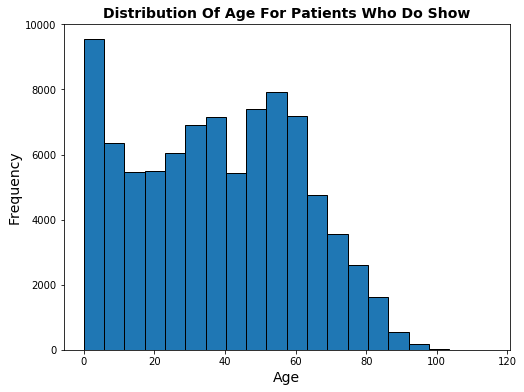

In [37]:
##dataframe for those do show
df_no= df.query('no_show=="No"')
print(df_no['age'].describe())
##plot distribution of age for those do show
myHistPlot(df_no, 'age', title= ' for patients who do show')

From the description of the data for patients who attended on the scheduled day we can see, the number of patients are greater than number of patients who not attended.
The histogram scale here for patient's age who attended according to the scheduled day is wider than the scale of the histogram before it, which means that the number of patients who attended according to the scheduled day larger than the number of patients who didn't attend at the scheduled day. 
This histogram also shows us generally that younger patients attend more than older patients whether what at the scheduled day or not.

### Which gender more showed up to their appointment ?

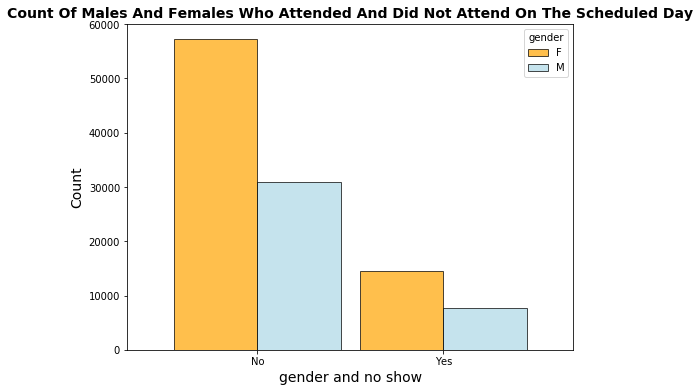

In [38]:
#gruopby, get counts, unstack, plot bar chartfor count of gender which did show and did not
df.groupby('gender')['no_show'].value_counts().unstack('gender').plot.bar(edgecolor='black',
                                                                                        figsize=[8,6],
                                                                                        rot=0,
                                                                                        width=0.9,
                                                                                        color=['orange', 'lightblue'], 
                                                                                        alpha=0.7);
plt.title('count of males and females who attended and did not attend on the scheduled day'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('gender and no show', fontsize=14);
plt.ylabel('Count', fontsize=14);

This bar chart shows us that the count of female patients who attend at the scheduled day is more than the count of male patients.

### How many days patients become late from scheduled day ?

calculating the difference between the appointment day and scheduled day to know how many day patients take to attend after the scheduled day.

In [39]:
#get the difference betweeen appointment day and scheduled day to calculate delay days
delay_day = df['appointment_day']-df['scheduled_day']

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
dtype: object

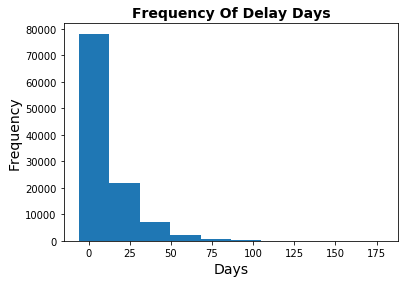

In [40]:
#plot frequency of delay days
delay_day.astype('timedelta64[D]').plot.hist();
plt.title('Frequency of delay days'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Days', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
delay_day.describe()

This histogram is skewed to the right and not following the normal distribution, so the median is more statically significant to descripe the late time.

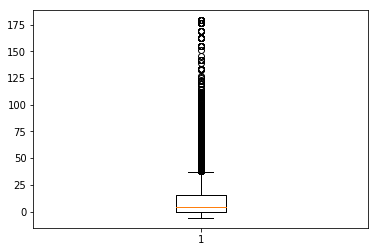

In [41]:
#plot boxplot for frequency of delay day 
plt.boxplot(delay_day.astype('timedelta64[D]'));

box plot is the best one to express the median. The median of delay is 4 days 

### Which the most frequent place that patients showed up to their appointments ?

In [42]:
#dataframe for those did show
df_visit = df.query('no_show == "No"')
#count of patients who did show in each place then disply the first most 5 frequent places
df_neigh_visit= df_visit.neighbourhood.value_counts()
df_neigh_visit.head(5)

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: neighbourhood, dtype: int64

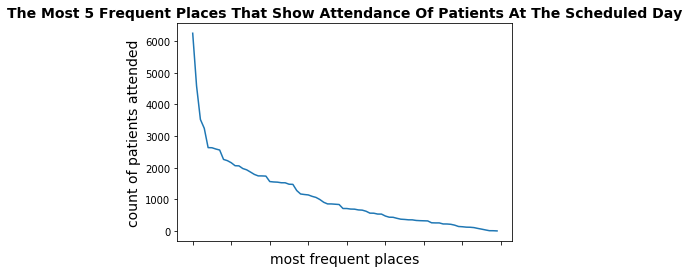

In [43]:
#plot most 5 frequent places that patients did show
df_neigh_visit.plot();
plt.title('The most 5 frequent places that show attendance of patients at the scheduled day'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('most frequent places', fontsize=14);
plt.ylabel('count of patients attended', fontsize=14);

The most 5 frequent places that show attendance of patients at the scheduled day, and the most frequent one is JARDIM CAMBURI.
may be the transportation to these places is easier or they are near to the most of people or they are public places.

### Does scholarship affect on patient's attendance according to scheduled day ?

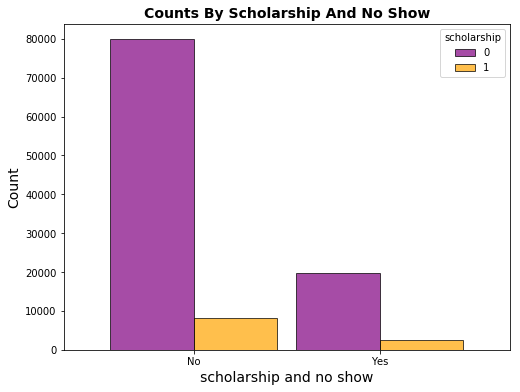

In [44]:
#groupby, counts, unstack, plotting bar chart that show counts by scholarship and no show
counts_scholarship = df.groupby ('scholarship')['no_show'].value_counts().unstack('scholarship').plot.bar(edgecolor='black',
                                                                                                          figsize=[8,6],
                                                                                                          rot=0,
                                                                                                          width=0.9,
                                                                                                          color=['purple', 'orange'],
                                                                                                          alpha=0.7);
plt.title('Counts by scholarship and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('scholarship and no show', fontsize=14);
plt.ylabel('Count', fontsize=14);

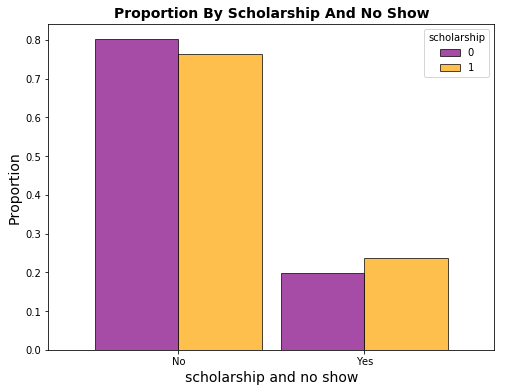

In [45]:
##groupby, counts, normalize, unstack, plotting bar chart that show proportion by scholarship and no show
counts_scholarship = df.groupby ('scholarship')['no_show'].value_counts(normalize=True).unstack('scholarship').plot.bar(edgecolor='black',
                                                                                                          figsize=[8,6],
                                                                                                          rot=0,
                                                                                                          width=0.9,
                                                                                                          color=['purple', 'orange'],
                                                                                                          alpha=0.7);
plt.title('Proportion by scholarship and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('scholarship and no show', fontsize=14);
plt.ylabel('Proportion', fontsize=14);

number of patients who had a scholarship and attended at their scheduled day is less than the number of patients who didn't had a scholarship and attended at their scheduled day. This means that scholarships affect negativily on the attendace at the scheduled day. 

### Does alcoholism affect on patient's attendance according to scheduled day ? 

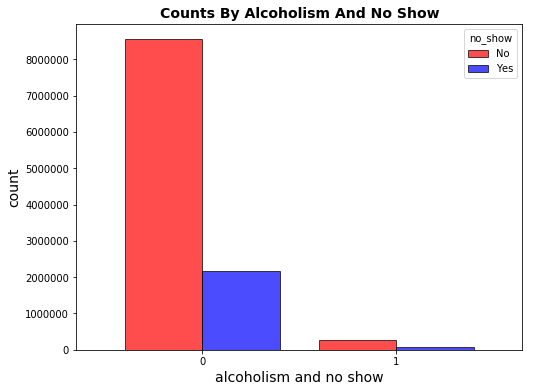

In [46]:
#groupby, counts, unstack, plotting bar chart that show counts by alcoholism and no show
df.groupby(['alcoholism'])['no_show'].value_counts().unstack('no_show').mul(100).plot.bar(edgecolor='black',
                                                                                                         figsize=[8,6],
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=['red','blue'],
                                                                                                         alpha=0.7);
plt.title('Counts by alcoholism and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('alcoholism and no show', fontsize=14)
plt.ylabel('count', fontsize=14);

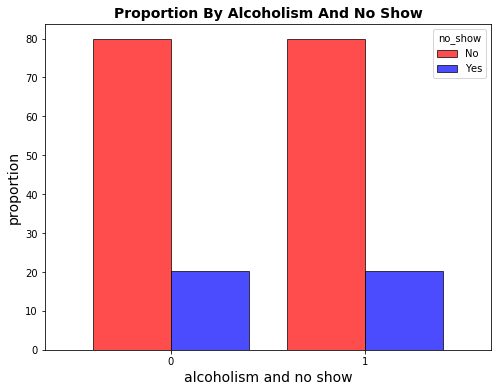

In [47]:
#groupby, counts, normalize, unstack, plotting bar chart that show proportion by alcoholism and no show
df.groupby(['alcoholism'])['no_show'].value_counts(normalize=True).unstack('no_show').mul(100).plot.bar(edgecolor='black',
                                                                                                         figsize=[8,6],
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=['red','blue'],
                                                                                                         alpha=0.7);
plt.title('Proportion by alcoholism and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('alcoholism and no show', fontsize=14)
plt.ylabel('proportion', fontsize=14);

non-alcoholic patients who attended at the scheduled day are more than alcoholisc patients who attended at the scheduled day and generally, non-alcoholic patients did show up more than alcoholic patients. so alcoholism affect negatively on the attendance at the scheduled day. 

### Does diabetes affect on patient's attendance according to scheduled day ?

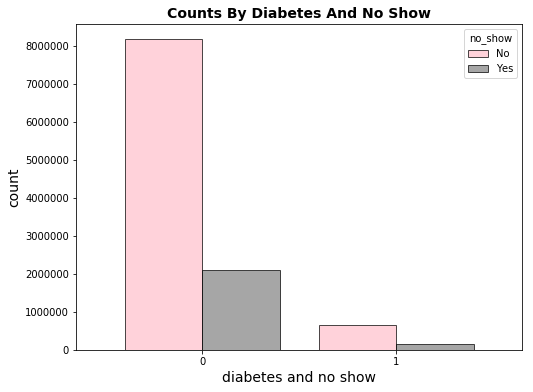

In [86]:
#groupby, counts, unstack, plotting bar chart that show counts by diabetes and no show
df.groupby(['diabetes'])['no_show'].value_counts().unstack('no_show').mul(100).plot.bar(edgecolor='black',
                                                                                                         figsize=[8,6],
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=['pink','grey'],
                                                                                                         alpha=0.7);
plt.title('Counts by diabetes and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('diabetes and no show', fontsize=14)
plt.ylabel('count', fontsize=14);

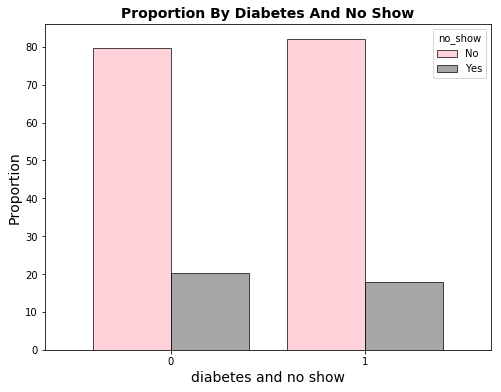

In [85]:
#groupby, counts, unstack, normalize, plotting bar chart that show proportion by diabetes and no show
df.groupby(['diabetes'])['no_show'].value_counts(normalize=True).unstack('no_show').mul(100).plot.bar(edgecolor='black',
                                                                                                         figsize=[8,6],
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=['pink','grey'],
                                                                                                         alpha=0.7);
plt.title('Proportion by diabetes and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('diabetes and no show', fontsize=14)
plt.ylabel('Proportion', fontsize=14);

non-diabetic patients who attended at the scheduled day are more than diabetic patients who attended at the scheduled day, so diabetes affect negatively on the attendance at the scheduled day 

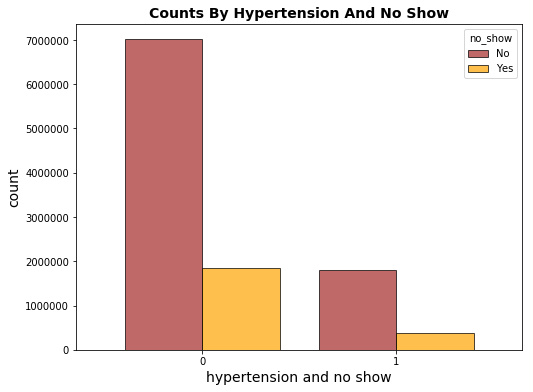

In [84]:
#groupby, counts, unstack, plotting bar chart that show counts by hypertension and no show
df.groupby(['hipertension'])['no_show'].value_counts().unstack('no_show').mul(100).plot.bar(edgecolor='black',
                                                                                                         figsize=[8,6],
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=['brown','orange'],
                                                                                                         alpha=0.7);
plt.title('Counts by hypertension and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('hypertension and no show', fontsize=14);
plt.ylabel('count', fontsize=14);



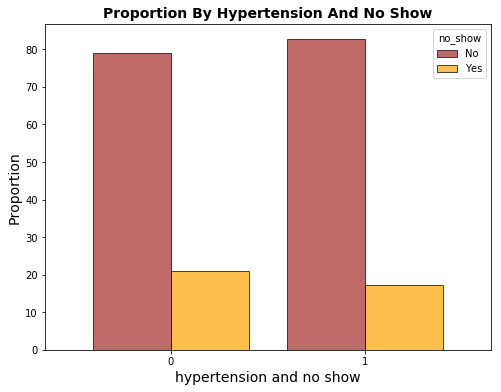

In [82]:
#groupby, counts, normalize, unstack, plotting bar chart that show proportion by hypertension and no show
df.groupby(['hipertension'])['no_show'].value_counts(normalize=True).unstack('no_show').mul(100).plot.bar(edgecolor='black',
                                                                                                         figsize=[8,6],
                                                                                                         rot=0,
                                                                                                         width=0.8,
                                                                                                         color=['brown','orange'],
                                                                                                         alpha=0.7);
plt.title('Proportion by hypertension and no show'.title(),
               fontsize = 14, weight = "bold");
plt.xlabel('hypertension and no show', fontsize=14);
plt.ylabel('Proportion', fontsize=14);



non-hypertension patients who attended at the scheduled day are more than hypertension patients who attended at the scheduled day, so hypertension affect negatively on the attendance at the scheduled day

0    12535
1     9784
Name: sms_received, dtype: int64


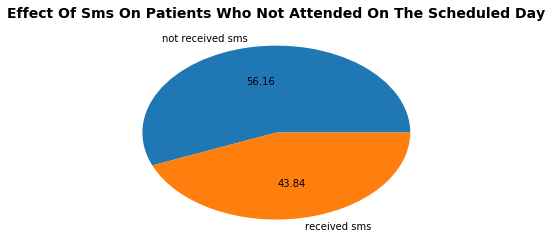

In [78]:
#dataframe for those did not show, count
df_yes = df.query('no_show == "Yes"')
df_sms_yes = df_yes.sms_received.value_counts()
print(df_sms_yes)
#plot pie chart for percentage 
mylabels = ["not received sms", "received sms"]
plt.title('Effect of SMS on patients who not attended on the scheduled day'.title(),
               fontsize = 14, weight = "bold")
plt.pie(df_sms_yes, labels = mylabels, autopct='%.2f');

Pie chart for the patients who didnot attend on the schedule day explains 43.8% of patients who recevied SMS didnot attend on the scheduled day. in addition, 56.2% of patients didnot receive SMS and didnot attend

0    62509
1    25698
Name: sms_received, dtype: int64


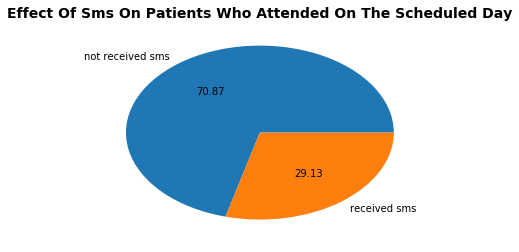

In [77]:
#dataframe for those did not show, count
df_no = df.query('no_show == "No"')
df_sms_no = df_no.sms_received.value_counts()
print(df_sms_no)
#plot pie chart for percentage 
mylabels = ["not received sms", "received sms"]
plt.title('Effect of SMS on patients who attended on the scheduled day'.title(), fontsize = 14, weight = "bold")
plt.pie(df_sms_no, labels = mylabels, autopct='%.2f');

for the patients who attend on the scheduled day, the Pie chart explains that only 29.2% of patients who recreived sms attended.
the SMS has low affect on the attendance of patients.

In [181]:
df.to_csv('project.csv')

<a id='conclusions'></a>
## Conclusions

from our exploration and visualizations we can find that :
* number of old patients who attend on the scheduled day is less than younger patients, so the age is an important factor.
* number of females who attend on the scheduled day is more than males, so the gender is an important factor.
* The most frequently delay days are 4 days.
* The most frequent place which had attendance of patients on the scheduled day is JARDIM CAMBURI.
* Scholarship affect negatively on the attendance at the scheduled day.
* non-alcoholism patients who attended at the scheduled day are more than alcoholism patients who attended at the scheduled day, so alcoholism affect negatively on the attendance of patients on the scheduled day. the same for diabetes and hypertension.
* for the patients who attend on the scheduled day, only 29.2% of patients who recreived sms attended, so SMS has low affect on the attendance of patients.

### Limitations :
During analyzing data, I found some limitations as :
- In the handcap column, there are 3 and 4 values which are strange values as these columns has only 0, 1 values that indicate if the patient is handicapped or not.
- Data need to have another factors beside the patient's health condition which may influance in no show such as weather condition.

In [182]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0